<a href="https://colab.research.google.com/github/emvalt/CS167Fall22Notebook5/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project #2
##Name: Emily Valtman

Proposed Points (out of 25):

# 1. Problem
State the problem you are trying to solve with this machine learning experiment. Include a description of the data, where you got the data, and what you're trying to predict..

I am trying to see what model will predict if there is more of a chance or less of a chance of a patient having a heart attack based on the predictors, which include age, gender, whether or not the patient has had exercise induced angina, number of major vassels (0-3), chest pain type 1-4 (1. typical angina, 2. atypical angina, 3. non-anginal pain, 4. asymptomatic), resting blood pressure in mm Hg, cholestoral in mg/dl fetched via BMI sensor, fasting blood sugar > 120 mg/dl) (0 = false,     1 = true), resting electrocardiographic results (0: normal, 1: having ST-T wave abnormality; meaning T wave inversions and/or ST elevation or depression of > 0.05 mV, 2: showing probable or definite left ventricular hypertrophy by Estes' criteria), thalach or maximum heart rate achieved (0: more chance of heart attack, 1: less chance of heart attack), old peak. I got my data off of Kaggle. I am interested in this data and predicting more or less of a chance of a patient having a heart attack because my dad has always had minor heart problems. He had open heart surgery a few years ago because one of his valves wasn't pumping blood properly. Now, a few years later, his resting heart rate is around 120 bpm. The doctors don't know why because he is an extremely healthy guy for his age. I am a little worried about him but I am interested to see what some of our models from class will predict for these patients based on their numbers for the predictors. This data set is clean and exclusively says "a dataset for heart attack classification".

# 2. Data Preparation
Explain your data preparation. What did you have to do to get your data in shape for your experiments? Why are you certain that you data is clean and prepared for use in your algorithms?

One of the first things I checked when cleaning/preparing my data for these experiments, I checked for any null values. Shockingly there were none! (amazing, that saved some time). After seeing there were no null values, I was excited and almost certain my data was clean and ready because based on what Kaggle said about the data set, I could tell it was clean and fairly easy to use. I knew this because there was a lot of information about the data set. There are explanations for all the predictors I will be using, and there is a lot of extra information including dicussions between people that used it, 104,111 downloads, and 639,933 views. All this said, it is clear a lot of people have not only considered the data set for use, but a lot of people have used it for purposes similar to mine for this project.

Another thing I did not have to do to clean my data was convert floats to integers because there were no floats! This also eliminated having to make any dummy variables. I did not purposely pick this data set because I was not genius enough to think ahead and consider no null values and also no floats. Although I didn't, I am really happy the data set I chose based on the information and predictors was also clean and ready to be used!

# 3. Research

Put your code and your experiments here.

In [1]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import libraries
import sklearn
import pandas
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import neighbors

# load data
heart_data = pandas.read_csv('/content/drive/MyDrive/CS167Datasets/heart.csv')

Looking at the data to see what I am working with. Very pleased to see there are no floats.

In [7]:
heart_data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
heart_data.shape

(303, 14)

There are 303 patients, and 14 columns. Not a huge data set, but the predictors will be great at predicting if a patient has a lower higher chance of a heart attack. (this is my pre-experiment assumption).

In [ ]:
# code goes here... don't forget to include graphs. Professor Urness loves graphs.

Checking to see what predictors have null values. Shockingly there are no null values, which is great news!

In [13]:
heart_data.isna().any()

age         False
sex         False
cp          False
trtbps      False
chol        False
fbs         False
restecg     False
thalachh    False
exng        False
oldpeak     False
slp         False
caa         False
thall       False
output      False
dtype: bool

Splitting the data into the training and testing sets with the cleaned data (the original data). Using output as the target since that is what we are want to predict. Output is the chances of being more or less likely for a heart attack.

## Regression Models ##

In [8]:
target= 'output'
predictors = heart_data.columns.drop(target) 
train_data, test_data, train_sln, test_sln = train_test_split(heart_data[predictors], heart_data[target], test_size = 0.2, random_state=41)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_data)
train_data_normalized = scaler.transform(train_data)
test_data_normalized = scaler.transform(test_data)

MSE:  0.13813148210103712
r2:  0.44613443437719924


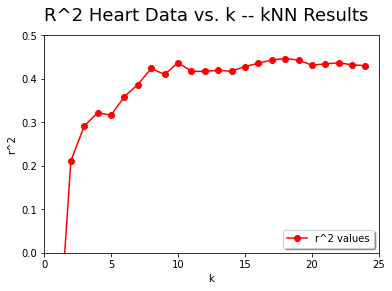

In [41]:
# creating the regression model for knn
neigh = neighbors.KNeighborsRegressor(n_neighbors=28) 

neigh.fit(train_data_normalized, train_sln)
predictions = neigh.predict(test_data_normalized)

print('MSE: ', metrics.mean_squared_error(test_sln, predictions))
print('r2: ', metrics.r2_score(test_sln, predictions))

# graphing the knn regression model
import matplotlib.pyplot as plt
%matplotlib inline

k_vals = range(1,25)
r2_vals = []

for k in k_vals:
    neigh = neighbors.KNeighborsRegressor(n_neighbors=k)
    neigh.fit(train_data_normalized, train_sln)
    predictions = neigh.predict(test_data_normalized)
    r2_val = sklearn.metrics.r2_score(test_sln,predictions)
    r2_vals.append(r2_val)

plt.suptitle('R^2 Heart Data vs. k -- kNN Results',fontsize=18)
plt.xlabel('k')
plt.ylabel('r^2')
plt.plot(k_vals,r2_vals,'ro-',label='r^2 values')
plt.legend(loc='lower right', shadow=True)
plt.axis([0,25,0,.5])
plt.show()

MSE:  0.13876628979389857
r2:  0.4435890470656286


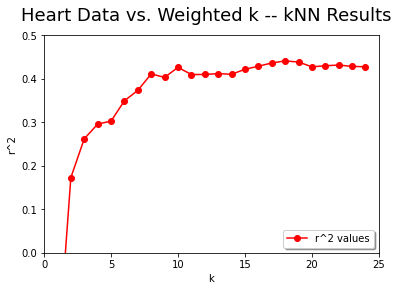

In [42]:
# Creating the regression model for weighted knn
neigh = neighbors.KNeighborsRegressor(n_neighbors=28, weights='distance')
neigh.fit(train_data_normalized, train_sln)
predictions = neigh.predict(test_data_normalized)

print('MSE: ', metrics.mean_squared_error(test_sln, predictions))
print('r2: ', metrics.r2_score(test_sln, predictions))

# graphing the weighted knn regression model
import matplotlib.pyplot as plt
%matplotlib inline

k_vals = range(1,25)
r2_vals = []

for k in k_vals:
    neigh = neighbors.KNeighborsRegressor(weights='distance',n_neighbors=k)
    neigh.fit(train_data_normalized, train_sln)
    predictions = neigh.predict(test_data_normalized)
    r2_val = sklearn.metrics.r2_score(test_sln,predictions)
    r2_vals.append(r2_val)

plt.suptitle('Heart Data vs. Weighted k -- kNN Results',fontsize=18)
plt.xlabel('k')
plt.ylabel('r^2')
plt.plot(k_vals,r2_vals,'ro-',label='r^2 values')
plt.legend(loc='lower right', shadow=True)
plt.axis([0,25,0,.5])
plt.show()

MSE:  0.19672131147540983
r2:  0.2112068965517241


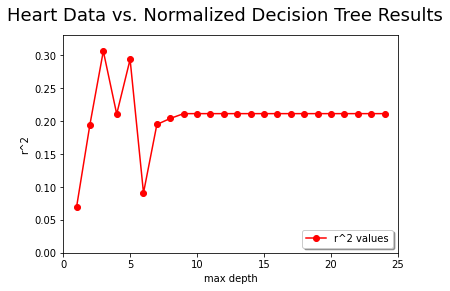

In [46]:
# Creating the decision tree regression model 
dt = tree.DecisionTreeRegressor(random_state = 0)
dt.fit(train_data_normalized,train_sln)
predictions = dt.predict(test_data_normalized)

print('MSE: ', metrics.mean_squared_error(test_sln, predictions))
print('r2: ', metrics.r2_score(test_sln, predictions))

# graphing the decision tree regression model
import matplotlib.pyplot as plt
%matplotlib inline

max_depth_vals = range(1,25)
r2_vals = []

for max_depth_val in max_depth_vals:
    dt = tree.DecisionTreeRegressor(random_state = 0, max_depth = max_depth_val)
    dt.fit(train_data_normalized,train_sln)
    predictions = dt.predict(test_data_normalized)
    r2_val = sklearn.metrics.r2_score(test_sln,predictions)
    r2_vals.append(r2_val)
    
plt.suptitle('Heart Data vs. Normalized Decision Tree Results',fontsize=18)
plt.xlabel('max depth')
plt.ylabel('r^2')
plt.plot(max_depth_vals,r2_vals,'ro-',label='r^2 values')
plt.legend(loc='lower right', shadow=True)
plt.axis([0,25,0,.33])
plt.show()

## Classification Models ##

Accuracy: 0.819672131147541


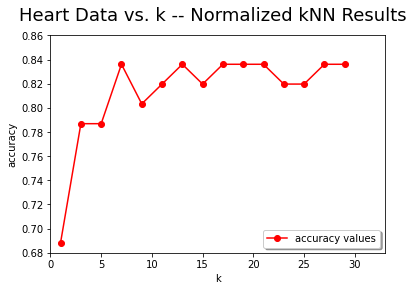

In [52]:
# creating the classification model for knn
neigh = neighbors.KNeighborsClassifier(n_neighbors=28) 
neigh.fit(train_data_normalized, train_sln)
predictions = neigh.predict(test_data_normalized)

# Measuring performance
print("Accuracy:", metrics.accuracy_score(test_sln,predictions))

# Graphing the classification model for knn
k_vals = range(1,31,2)
accuracy_vals = []

for k in k_vals:
    neigh = neighbors.KNeighborsClassifier(weights="uniform", n_neighbors=k)
    neigh.fit(train_data_normalized, train_sln)
    predictions = neigh.predict(test_data_normalized)
    accuracy_val = sklearn.metrics.accuracy_score(test_sln,predictions)
    accuracy_vals.append(accuracy_val)

plt.suptitle('Heart Data vs. k -- Normalized kNN Results',fontsize=18)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(k_vals,accuracy_vals,'ro-',label='accuracy values')
plt.legend(loc='lower right', shadow=True)
plt.axis([0,33,.68,.86])
plt.show()

Accuracy: 0.819672131147541


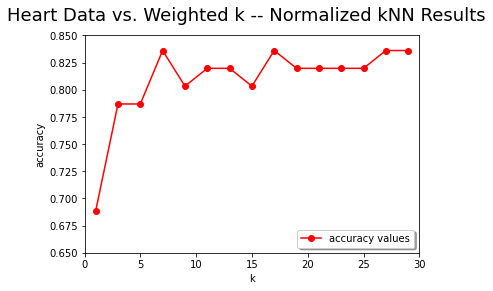

In [54]:
# creating the classification model for weighted knn
neigh = neighbors.KNeighborsClassifier(weights="distance", n_neighbors=28) 
neigh.fit(train_data_normalized, train_sln)
predictions = neigh.predict(test_data_normalized)

# Measuring performance
print("Accuracy:", metrics.accuracy_score(test_sln,predictions))

# Graphing the classification model for weighted knn
k_vals = range(1,30,2)
accuracy_vals = []

for k in k_vals:
    neigh = neighbors.KNeighborsClassifier(weights="distance", n_neighbors=k)
    neigh.fit(train_data_normalized, train_sln)
    predictions = neigh.predict(test_data_normalized)
    accuracy_val = sklearn.metrics.accuracy_score(test_sln,predictions)
    accuracy_vals.append(accuracy_val)

plt.suptitle('Heart Data vs. Weighted k -- Normalized kNN Results',fontsize=18)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(k_vals,accuracy_vals,'ro-',label='accuracy values')
plt.legend(loc='lower right', shadow=True)
plt.axis([0,30,.65,.85])
plt.show()

Accuracy: 0.7704918032786885


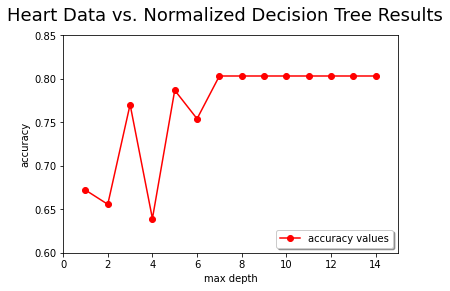

In [59]:
# Creating the decision tree classification model
dt = tree.DecisionTreeClassifier(random_state=41)
dt.fit(train_data_normalized,train_sln)
predictions = dt.predict(test_data_normalized)

# Measuring performance
print("Accuracy:", metrics.accuracy_score(test_sln,predictions))

# graphing the decision tree classification model
import matplotlib.pyplot as plt
%matplotlib inline

max_depth_vals = range(1,15)
accuracy_vals = []

for max_depth_val in max_depth_vals:
    dt = tree.DecisionTreeClassifier(random_state = 0, max_depth = max_depth_val)
    dt.fit(train_data_normalized,train_sln)
    predictions = dt.predict(test_data_normalized)
    accuracy_val = sklearn.metrics.accuracy_score(test_sln,predictions)
    accuracy_vals.append(accuracy_val)
    
plt.suptitle('Heart Data vs. Normalized Decision Tree Results',fontsize=18)
plt.xlabel('max depth')
plt.ylabel('accuracy')
plt.plot(max_depth_vals,accuracy_vals,'ro-',label='accuracy values')
plt.legend(loc='lower right', shadow=True)
plt.axis([0,15,.6,.85])
plt.show()

#4. Analysis

What did you discover? What insights/recommendations do you have? What did you find that was interesting? Which model was your best model, which models didn't work well? Why do you think this is? In general, I want a discussion of your experiment, the results, and what they mean.

*your answer here*

# 5. Bumps in the Road
What challenges did you encounter? How did you overcome these challenges?

*your answer here*